## Demonstrate the impact of quantization for images, through clustering

Quantization of images refers to the process of reducing the number of colors or intensity levels used to represent an image. This reduction is typically achieved by clustering similar colors together and representing them with a single color. Clustering algorithms, such as K-means or MeanShift, are commonly used for this purpose.

Importing libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Taking image input and plotting

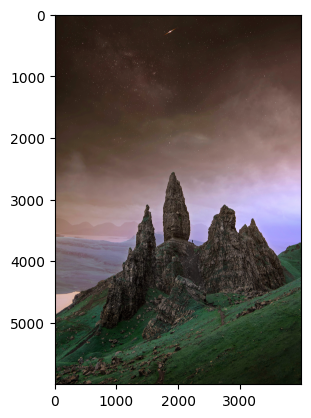

In [3]:
image = cv2.imread('a.jpg')
plt.imshow(image)
plt.show()

Squared Euclidean Distance - The squared Euclidean distance between original and quantized colors refers to the measure of dissimilarity between each pixel's original color and its corresponding color after quantization. It quantifies the difference between the RGB values of the original and quantized colors in a pixel-wise manner. This distance is squared to penalize larger differences more heavily, providing a meaningful metric for evaluating the fidelity of color representation in the quantized image compared to the original.

Code to quantize an image using K-means clustering, measuring the loss in terms of squared Euclidean distance between original and quantized colors, scaled for readability.

In [ ]:
# Function for quantizing the image using k-means
def quantimage(image, k):
    i = np.float32(image).reshape(-1,3)
    condition = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
    start_time = time.time()
    ret, label, center = cv2.kmeans(i, k, None, condition, 10, cv2.KMEANS_RANDOM_CENTERS)
    end_time = time.time()

    center = np.uint8(center)
    final_img = center[label.flatten()]
    final_img = final_img.reshape(image.shape)

    # Calculate loss
    loss = np.sum((i - center[label.flatten()]) ** 2)

    return final_img, (end_time - start_time), loss/(10**10)

Code to visualize the impact of image quantization on image across various cluster counts. It iterates over a range of cluster counts, quantizes the image using K-means clustering, and plots the resulting images. Each subplot displays the quantized image and the corresponding cluster count, processing time, and scaled loss metric.

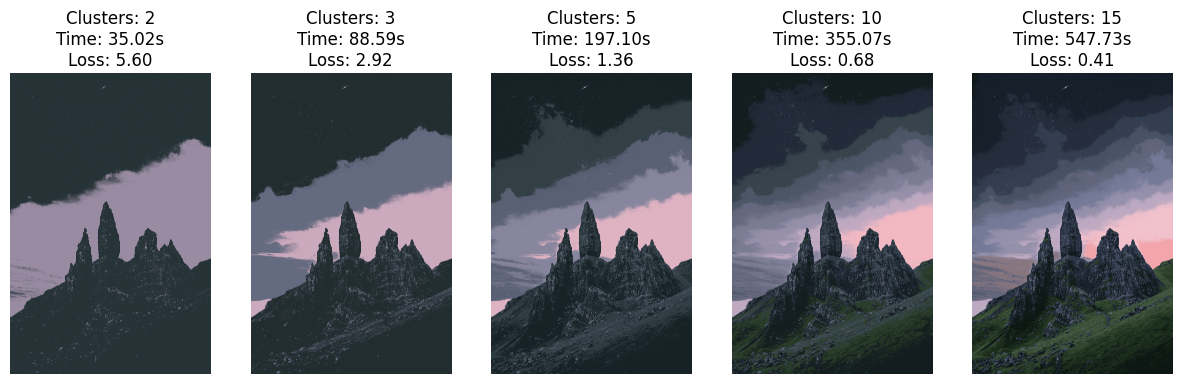

In [4]:
# Example usage
image = cv2.imread('a.jpg')

# Define number of clusters
num_clusters = [2, 3, 5, 10, 15]

# Plot images for different numbers of clusters
fig, axs = plt.subplots(1, len(num_clusters), figsize=(15, 5))
for i, k in enumerate(num_clusters):
    quantized_img, time_taken, loss = quantimage(image, k)
    axs[i].imshow(cv2.cvtColor(quantized_img, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f'Clusters: {k}\nTime: {time_taken:.2f}s\nLoss: {loss:.2f}')
    axs[i].axis('off')

plt.show()

As the number of clusters increases, the computational time for quantization grows while the loss in fidelity decreases. This trade-off illustrates the balance between processing complexity and preserving image quality in clustering-based image quantization.

### Thank-you